# Mall Customers

This project applied Agglomerative Clustering to segment mall customers based on their demographics and spending behavior. The analysis revealed five distinct customer clusters, each characterized by unique attributes such as age, annual income, spending score, and principal component (PCA) distributions.

Businesses can use these insights to:

- Create targeted promotions and discounts.
- Identify high-value customers (e.g., those with high spending scores) to develop loyalty programs.
- Understand customer demographics and spending patterns to help businesses make informed decisions on product placement and service offerings.
- Identify at-risk customers (e.g., those with low spending scores) allows businesses to re-engage them with special offers.

#### Data

The dataset used in this project contains customer demographic and spending data collected from a mall. The key features include:

- Customer ID (Unique identifier for each customer)
- Age (Customer's age in years)
- Annual Income (Customer’s annual income in $1000s)
- Spending Score (A score assigned based on customer behavior, ranging from 1 to 100)

### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

### 2. Load the Data

In [2]:
# Unzipping the file
with zipfile.ZipFile('Mall_Customers.zip', 'r') as zip_ref:
    zip_ref.extractall('Mall_Customers')

# Load the CSV file
df = pd.read_csv('Mall_Customers/Mall_Customers.csv')

# Display the first few rows of the dataset
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 3. Exploratory Data Analysis (EDA)

In [3]:
# Check the basic info of the dataset
print("\nData Types and Non-Null Counts:\n")
print(df.info())

# Check for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())

# Check the unique values in the categorical column (if any)
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


Data Types and Non-Null Counts:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Missing Values:

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Unique values in 'Genre':
['Male' 'Female']


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### Overall Business Insights

**Diverse Age Group**:
- Customers range from 18 to 70 years old, with most between 36-49 years.
- Marketing can be age-targeted, with different campaigns for younger vs. older customers.

**Varied Income Levels**:
- Annual income ranges from $15k to $137k, so the mall has both budget shoppers and high-income earners.
- Businesses can use tiered pricing strategies to cater to both groups.

**Different Spending Behaviors**:
- Some customers spend very little (1-34), while others spend a lot (73-99).
- The business can identify and retain high spenders while engaging low spenders with special offers.

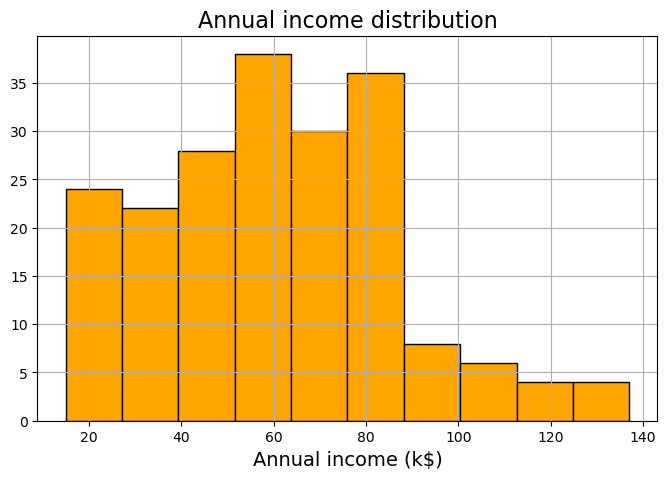

In [5]:
plt.figure(figsize=(8,5))
plt.title("Annual income distribution",fontsize=16)
plt.xlabel ("Annual income (k$)",fontsize=14)
plt.grid(True)
plt.hist(df['Annual Income (k$)'],color='orange',edgecolor='k')
plt.show()

### 4. Preprocessing

In [6]:
# Encode categorical variable 'Genre'
df['Genre'] = df['Genre'].map({'Male': 1, 'Female': 0})

# Drop CustomerID
df.drop(['CustomerID'], axis=1, inplace=True)

# Scaling numerical features
scaler = StandardScaler()
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# NumPy-based data manipulation
np_data = df.to_numpy()
filtered_customers = np_data[np_data[:, 2] > 0.5]  # Example: Filter customers with Spending Score > mean
print(f"Filtered Customers Shape: {filtered_customers.shape}")

Filtered Customers Shape: (62, 4)


### 5. Customer Clustering

Uses Agglomerative Clustering (hierarchical clustering) to group customers based on Annual Income and Spending Score. Then evaluates cluster quality using Silhouette Score and Davies-Bouldin Score.

In [7]:
# Clustering with Agglomerative Clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
df['Cluster'] = hc.fit_predict(X)

# Cluster Evaluation Metrics
silhouette_avg = silhouette_score(X, df['Cluster'])
davies_bouldin = davies_bouldin_score(X, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")

Silhouette Score: 0.5538
Davies-Bouldin Score: 0.5779


### Interepretation

- The clusters seem well-defined but may have some overlap.
- The clustering is effective, but there might be opportunities for refinement (e.g., adjusting the number of clusters).

**Boxplots to compare how Age, Income, and Spending Score vary across clusters.**

C:\Users\milto\AppData\Local\Temp\ipykernel_2120\598644654.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Age', data=df, palette='Set2')


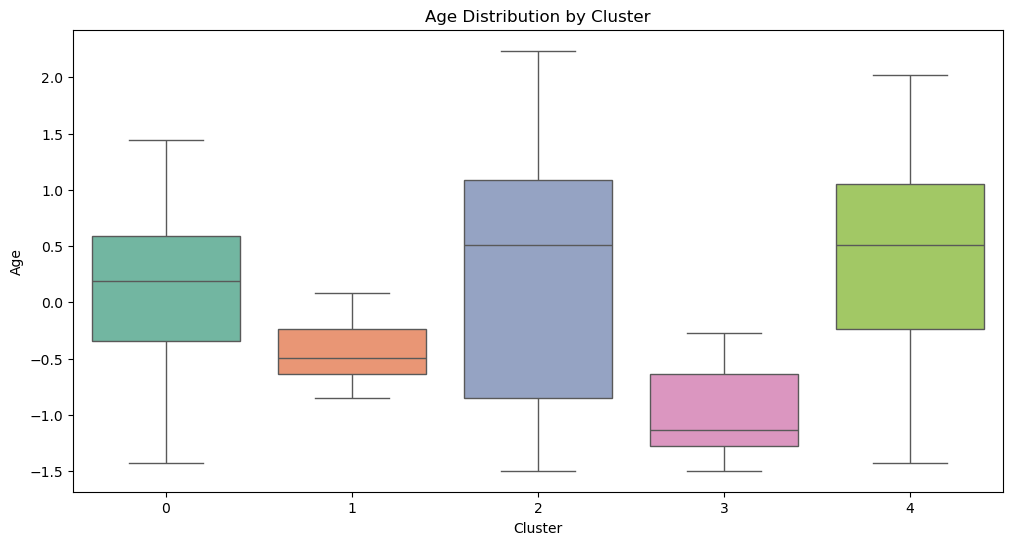

C:\Users\milto\AppData\Local\Temp\ipykernel_2120\598644654.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df, palette='Set3')


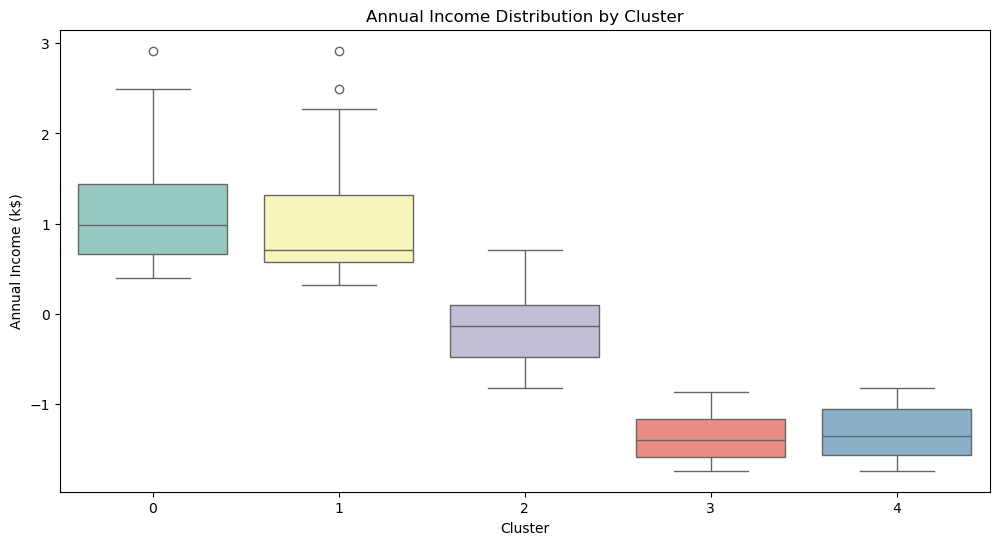

C:\Users\milto\AppData\Local\Temp\ipykernel_2120\598644654.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df, palette='Set1')


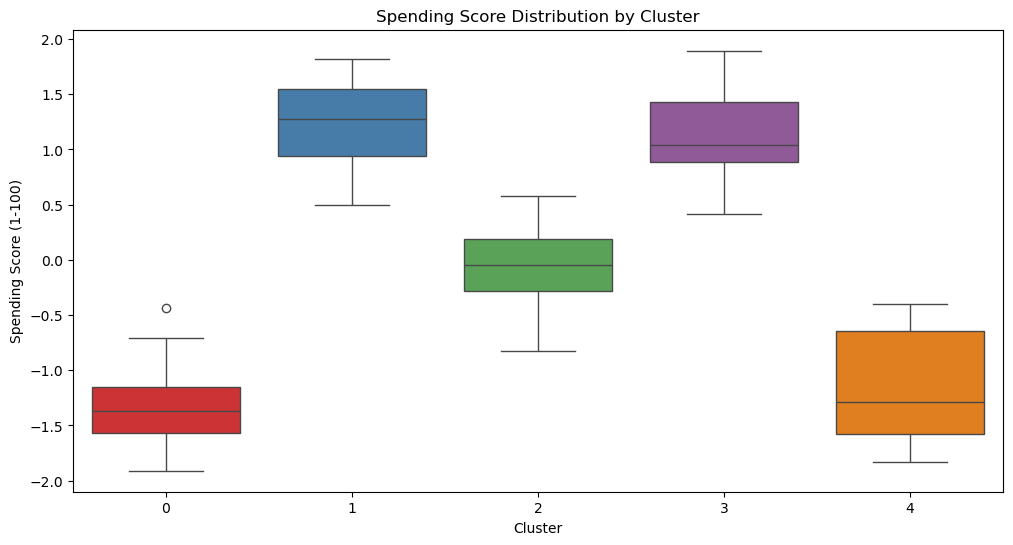

In [8]:
# Boxplots for cluster analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Age', data=df, palette='Set2')
plt.title('Age Distribution by Cluster')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df, palette='Set3')
plt.title('Annual Income Distribution by Cluster')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df, palette='Set1')
plt.title('Spending Score Distribution by Cluster')
plt.show()

**Pivot Table to analyze gender-based spending behavior in different clusters.**

In [9]:
# Pivot table: Gender vs. Spending Score
pivot = df.pivot_table(values='Spending Score (1-100)', index='Genre', columns='Cluster', aggfunc='mean')
print("\nPivot Table: Gender vs. Spending Score\n", pivot)


Pivot Table: Gender vs. Spending Score
 Cluster         0         1         2         3         4
Genre                                                    
0       -1.147454  1.221585 -0.060288  1.228055 -1.105860
1       -1.495924  1.260407 -0.013473  1.066299 -1.185352


#### Implication

- High-spending clusters (1 & 3) should be targeted with premium products and personalized promotions.
- Low-spending clusters (0 & 4) may need discounts or engagement strategies to increase spending.

**Visualization & Business Insights**:

I uses PCA (Principal Component Analysis) to reduce data dimensions and visualize customer segments in 2D. Plots show the number of customers in each cluster to identify which groups are most dominant.

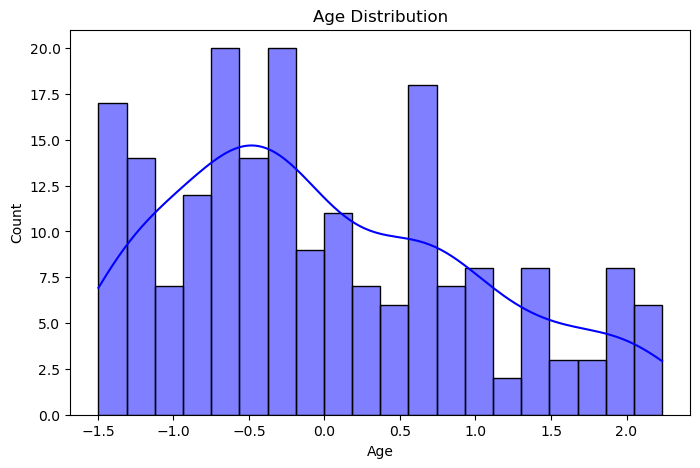

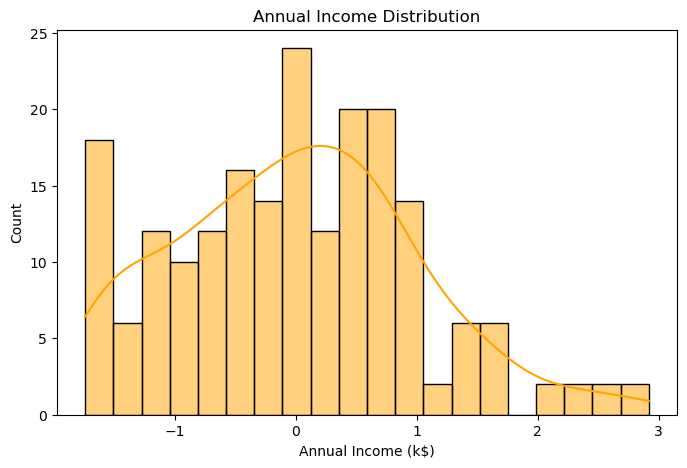

In [10]:
# Distribution analysis
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, color='blue', bins=20)
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df['Annual Income (k$)'], kde=True, color='orange', bins=20)
plt.title("Annual Income Distribution")
plt.show()

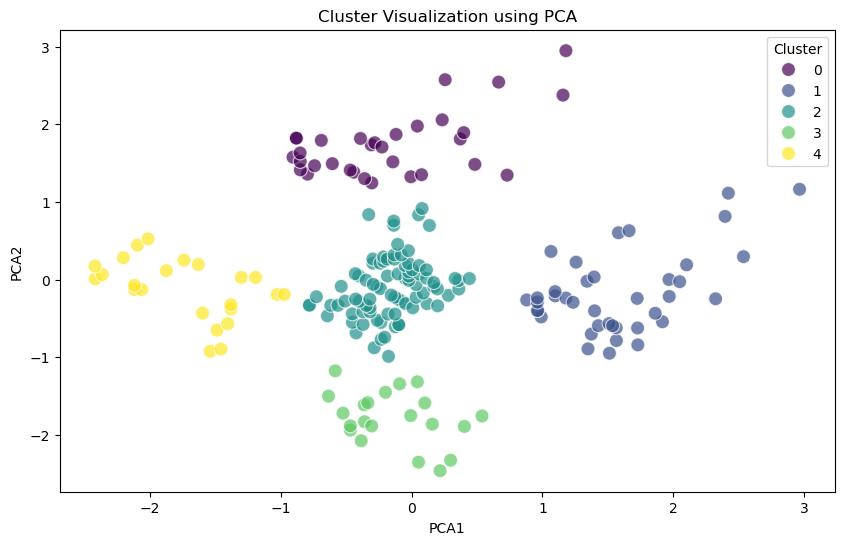

In [11]:
# PCA for visualizing clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.title('Cluster Visualization using PCA')
plt.show()


Cluster Size:
 Cluster
0    32
1    39
2    85
3    21
4    23
Name: count, dtype: int64


C:\Users\milto\AppData\Local\Temp\ipykernel_2120\1163146534.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='pastel')


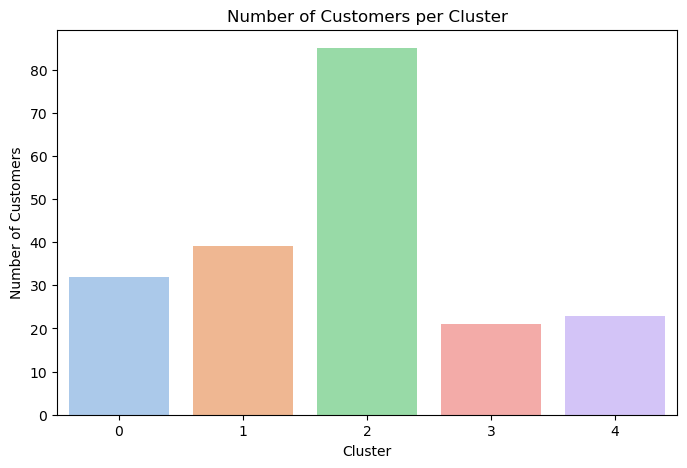

In [12]:
# Cluster size analysis
cluster_counts = df['Cluster'].value_counts().sort_index()
print("\nCluster Size:\n", cluster_counts)
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='pastel')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Number of Customers per Cluster')
plt.show()

#### Implications

- Largest Cluster (2): General marketing strategies should cater to this segment.
- Smaller Clusters (3 & 4): If they are high-value customers, exclusive loyalty programs or personalized offers may help increase engagement.

### 6. Further Analysis


Cluster Summary (mean of each feature per cluster):
            Genre       Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                   
0        0.562500  0.154298            1.101045               -1.343469   
1        0.461538 -0.441917            0.991583                1.239503   
2        0.400000  0.260682           -0.181237               -0.041562   
3        0.428571 -0.970046           -1.353670                1.158731   
4        0.391304  0.456967           -1.307519               -1.136965   

             PCA1      PCA2  
Cluster                      
0       -0.171419  1.728532  
1        1.577616 -0.175306  
2       -0.157543 -0.098766  
3       -0.137842 -1.776536  
4       -1.728511 -0.120599  

Cluster Counts:
Cluster
0    32
1    39
2    85
3    21
4    23
dtype: int64

Cluster Median:
         Genre       Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                     

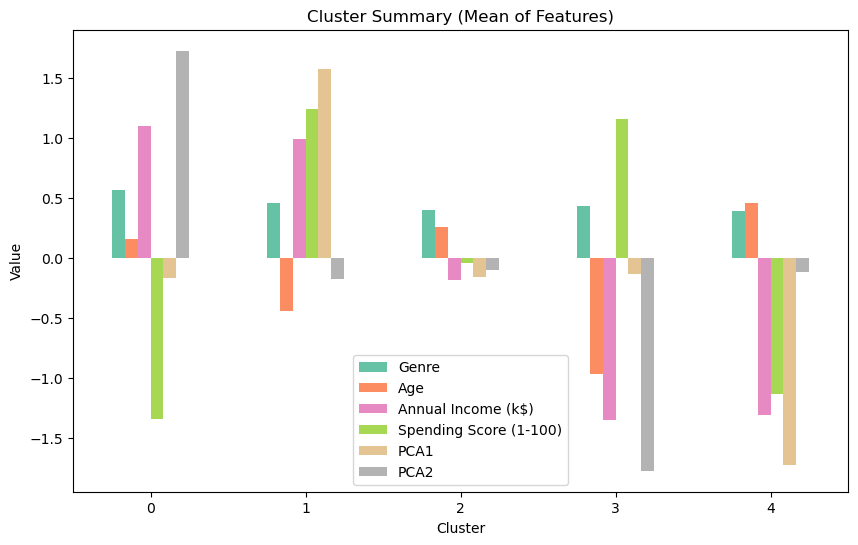

In [13]:
# Calculate the mean of each cluster and print a summary
cluster_summary = df.groupby('Cluster').mean()
print("\nCluster Summary (mean of each feature per cluster):")
print(cluster_summary)

# Calculate other statistics like count, median, or standard deviation
cluster_count = df.groupby('Cluster').size()
cluster_median = df.groupby('Cluster').median()
cluster_std = df.groupby('Cluster').std()

# Print additional statistics
print("\nCluster Counts:")
print(cluster_count)

print("\nCluster Median:")
print(cluster_median)

print("\nCluster Standard Deviation:")
print(cluster_std)

# Visualizing cluster summary for each feature
cluster_summary.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title('Cluster Summary (Mean of Features)')
plt.ylabel('Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.show()

#### Business Insights & Recommendations

**Target Cluster 1 with Premium Products**
- Young, high-income, high-spending customers → Offer luxury products, exclusive memberships, and loyalty programs.
- Personalized ads focusing on status, exclusivity, and quality.

**Offer Budget-Friendly Deals to Cluster 3**
- Young, low-income, but high-spending customers → They spend impulsively despite low income.
- Student discounts, buy-now-pay-later options, and budget-friendly product lines may work well.

**Maintain Engagement with Cluster 2 (Largest Segment)**
- They represent the "average" customer in terms of spending and income.
- Regular promotions, seasonal discounts, and personalized product recommendations may increase spending.

**Convert Cluster 0 to Higher Spending**
- They have high incomes but low spending.
- Premium loyalty programs, exclusive perks, and targeted ads to encourage spending.
- Possibly, they prefer savings over spending, so bundled offers or limited-time discounts might work.

**Optimize Offers for Cluster 4 (Older, Low-Income, Low-Spending)**
- Likely retirees or cost-conscious consumers.
- Discounts, practical & necessity-based promotions, and bundles for essentials might be appealing.

## Conclusion

The analysis revealed five distinct customer clusters, each characterized by unique attributes such as age, annual income, spending score, and principal component (PCA) distributions.

**Key findings from the clustering results include**:

- High-spending customers were identified, allowing businesses to develop targeted loyalty programs and personalized marketing campaigns.

- Low-spending customers were also segmented, helping businesses create strategies to re-engage them through special promotions or personalized offers.

- Customer segmentation based on age and income levels enables businesses to optimize product placement and service offerings tailored to specific demographic groups.

- The PCA analysis provided further insights into how customer groups are distributed in lower-dimensional space, reinforcing the distinctiveness of each cluster.